$$
\begin{aligned}
\textbf{Author} &: Ewen Wang\\
\textbf{Email} &: EwenWangSH@cn.ibm.com
\end{aligned}
$$

**Source:**

- [Christian Hill](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/)

- [Wikipedia](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model)

# Introduction

**The purpose of this project is to build cascading models in finance and risk management field by exploring models in epidemic area.** This is a result of the large similarity these two scenories share. The project starts with and mainly focuses on SIR model, one of the simplest compartmental models and many models are derivations of this basic form. 

# The SIR Epidemic Model

A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of $N$ individuals into three "compartments" which may vary as a function of time $t$:

- $S(t)$ are those susceptible but not yet infected with the disease;
- $I(t)$ is the number of infectious individuals;
- $R(t)$ are those individuals who have recovered from the disease and now have immunity to it.

**Note:** $S(t) + I(t) + R(t) = Constant = N$

The SIR model describes the change in the population of each of these compartments in terms of two parameters, $\beta$ and $\gamma$. 

- $\beta$ describes the effective contact rate of the disease: an infected individual comes into contact with $\beta N$ other individuals per unit time (of which the fraction that are susceptible to contracting the disease is $\frac{S}{N}$. 
- $\gamma$ is the mean recovery rate: that is, $\frac{1}{\gamma}$ is the mean period of time during which an infected individual can pass it on.

The differential equations describing this model were first derived by Kermack and McKendrick [Proc. R. Soc. A, 115, 772 (1927)]:

$$
\begin{aligned}
\frac{dS}{dt} &= -\frac{\beta SI}{N} \\
\frac{dI}{dt} &= \frac{\beta SI}{N} - \gamma I \\
\frac{dR}{dt} &= \gamma I\\
\end{aligned}
$$

The following Python code integrates these equations for a disease characterised by parameters $\beta=0.2$, $1/\gamma =10$ days in a population of $N=1000$ (perhaps 'flu in a school). The model is started with a single infected individual on day 0: $I(0)=1$. 

The plotted curves of $S(t)$, $I(t)$ and $R(t)$ are styled to look a bit nicer than Matplotlib's defaults.

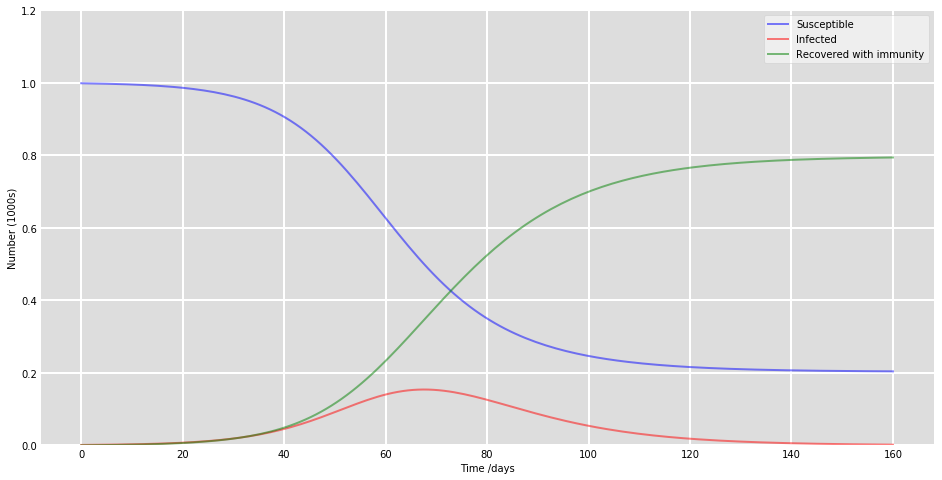

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 16, 8

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# Application in Risk Management

Likely in risk management field, people care about when and with what degree the risk of a company passes down to its neighbors and its neighbors' neigbors. The project believe it's a good start to apply SIR model in the risk managment area, and more complicated models may be employed in the future. 

To apply SIR model in risk management, one have to clearly know or try to find out following keys:

**Definitions**

- $S(t)$ are those susceptible but not yet infected with the **risk**;
- $I(t)$ is the number of infectious **companies**;
- $R(t)$ are those **companies** who have recovered from the **risk** and now have **immunity** to it.


- $\beta$ describes the effective contact rate of the **risk**: an infected **company** comes into contact with $\beta N$ other **conmpanies** per unit time (of which the fraction that are susceptible to contracting the **risk** is $\frac{S}{N}$. 
- $\gamma$ is the mean recovery rate: that is, $\frac{1}{\gamma}$ is the mean period of time during which an infected **risk** can pass it on.

**Assumptions**

Appearantly, this model only applies to the situation that one company can be infected only once by the risk; each node will be removed after infecting for immunity or death from it.

Fitting the risk management in SIR model requires 

- 1) accepting above definitions and assumptions;
- 2) find a way to measure each parameter.

**Note:** The object of the SIR epidemic model is the whole population in a community, while people sometimes care about the infected probability of a company at time $t$ in the risk management. The simplist solution is using

$$
\begin{aligned}
P(t) &= \frac{I(t)}{S(t) + I(t) + R(t)}\\
&= \frac{I(t)}{N}
\end{aligned}
$$

to simulate. Here, we asume that each company in the same community shares the same probability.

### To make sure our team are on the same page in this project, two questions arise as following:
- 1) Do you accept above definitions and assumptions?
- 2) Do you got any idea to figure out parameters in the model?

## The SI Epidemic Model

Another simple mathematical description of the spread of a disease in a population is the so-called SI model, which divides the (fixed) population of $N$ individuals into three "compartments" which may vary as a function of time $t$:

- $S(t)$ are those susceptible but not yet infected with the disease;
- $I(t)$ is the number of infectious individuals;

**Note:** $S(t) + I(t) = Constant = N$

The SI model describes the change in the population of each of these compartments in terms of one parameter, $\beta$. 

- $\beta$ describes the effective contact rate of the disease: an infected individual comes into contact with $\beta N$ other individuals per unit time (of which the fraction that are susceptible to contracting the disease is $\frac{S}{N}$. 

$$
\begin{aligned}
\frac{dS}{dt} &= -\frac{\beta SI}{N} \\
\frac{dI}{dt} &= \frac{\beta SI}{N}
\end{aligned}
$$

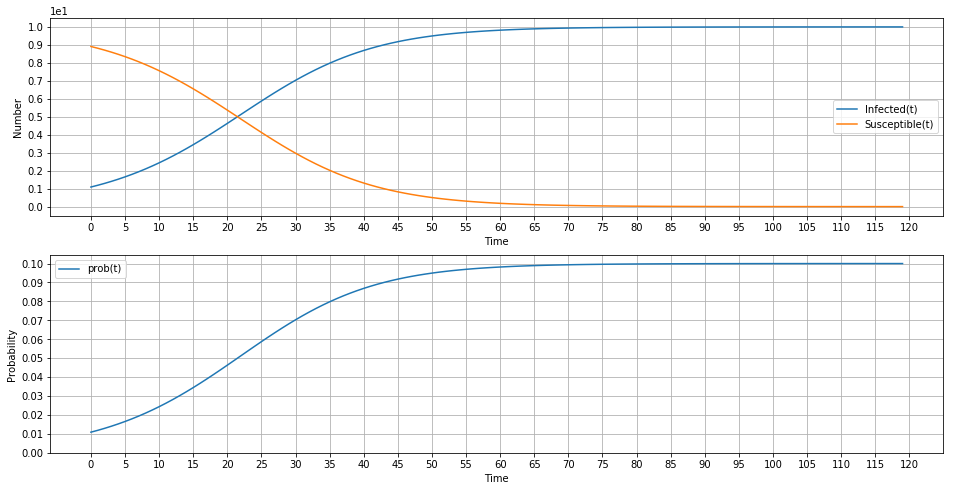

In [55]:
import matplotlib.pyplot as plt
import numpy as np

N = 10
S = N - 1
I = 1
beta = 0.1

sus = [] # infected compartment
inf = [] # susceptible compartment
prob = [] # probability of infection at time t

def infection(S, I, N):
    t = 0
    while (t < 120):
        S, I = S - beta * ((S * I / N)), I + beta * ((S * I) / N)
        p = beta * (I / N)
        sus.append(S)
        inf.append(I)
        prob.append(p)
        t += 1

infection(S, I, N)
figure = plt.figure(figsize=(16, 8))
# plt.title('SI Model')
figure.canvas.set_window_title('SI model')

# ax1
ax1 = figure.add_subplot(211)
inf_line, =plt.plot(inf, label='Infected(t)')
sus_line, = plt.plot(sus, label='Susceptible(t)')
plt.legend(handles=[inf_line, sus_line])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlabel('Time')
plt.ylabel('Number')
ax1.set_xticks(np.arange(0, 121, 5))
ax1.set_yticks(np.arange(0, 11, 1))
plt.grid()

# ax2
ax2 = figure.add_subplot(212)
prob_line = plt.plot(prob, label='prob(t)')
plt.legend(handles=prob_line)

type(ax2)  # matplotlib.axes._subplots.AxesSubplot

# manipulate
vals = ax2.get_yticks()
# ax2.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])

plt.xlabel('Time')
plt.ylabel('Probability')

ax2.set_xticks(np.arange(0, 121, 5))
ax2.set_yticks(np.arange(0, 0.11, 0.01))

plt.grid()
plt.show()